# B3GNT2 MDs for Fig 6 Analysis
***

### import MDs

In [2]:
import numpy as np
import MDAnalysis as md
from mdtraj.testing import get_fn
from MDAnalysis.analysis import dihedrals
import matplotlib.pyplot as plt
import nglview as nv
print("nglview version = {}".format(nv.__version__))

a = md.Universe('/FILE/WT/apo/topology.parm7','/FILE/WT/apo/WT_a.nc',format="NC")
b = md.Universe('/FILE/WT/apo/topology.parm7','/FILE/WT/apo/WT_r1_a.nc',format="NC")
c = md.Universe('/FILE/WT/apo/topology.parm7','/FILE/WT/apo/WT_r2_a.nc',format="NC")
d = md.Universe('/FILE/WT/complex/topology.parm7','/FILE/WT/complex/WT_c.nc',format="NC")
e = md.Universe('/FILE/WT/complex/topology.parm7','/FILE/WT/complex/WT_r1_c.nc',format="NC")
f = md.Universe('/FILE/WT/complex/topology.parm7','/FILE/WT/complex/WT_r2_c.nc',format="NC")
g = md.Universe('/FILE/T336I/complex/topology.parm7','/FILE/T336I/complex/t336i_r1_c.nc',format="NC")
h = md.Universe('/FILE/T336I/complex/topology.parm7','/FILE/T336I/complex/t336i_r2_c.nc',format="NC")
i = md.Universe('/FILE/T336I/complex/topology.parm7','/FILE/T336I/complex/t336i_r3_c.nc',format="NC")
j = md.Universe('/FILE/T336I/apo/topology.parm7','/FILE/T336I/apo/t336i_a.nc',format="NC")
k = md.Universe('/FILE/T336I/apo/topology.parm7','/FILE/T336I/apo/t336i_r1_a.nc',format="NC")
l = md.Universe('/FILE/T336I/apo/topology.parm7','/FILE/T336I/apo/t336i_r2_a.nc',format="NC")

nglview version = 3.0.3


### Atom Selection, Chi1 selection, time interval, and dihedral calculations

In [10]:
# WT apo select atoms
pa = a.select_atoms('protein')
pb = b.select_atoms('protein')
pc = c.select_atoms('protein')

# WT complex select atoms
pd = d.select_atoms('protein')
pe = e.select_atoms('protein')
pf = f.select_atoms('protein')

# T336I complex
pg = g.select_atoms('protein') #or around 4 protein -- selects 4 angstroms around protein
ph = h.select_atoms('protein')
pi = i.select_atoms('protein')

# T336I apo
pj = j.select_atoms('protein') #or around 4 protein -- selects 4 angstroms around protein
pk = k.select_atoms('protein')
pl = l.select_atoms('protein')

In [11]:
for res in pg.residues[242:243]:
    phig = res.chi1_selection()
    if phig is None:
        namesa = None
    else:
        namesa = phig.names
    print('{}: {} '.format(res.resname, namesa))

ASP: ['N' 'CA' 'CB' 'CG'] 


In [8]:
def movingaverage(interval, window_size=10):
    return np.convolve(interval, np.ones(window_size), 'same') / window_size

In [30]:
chia = [res.chi1_selection() for res in pa.residues[242:243]]
chib = [res.chi1_selection() for res in pb.residues[242:243]]
chic = [res.chi1_selection() for res in pc.residues[242:243]]
chid = [res.chi1_selection() for res in pd.residues[242:243]]
chie = [res.chi1_selection() for res in pe.residues[242:243]]
chif = [res.chi1_selection() for res in pf.residues[242:243]]
chig = [res.chi1_selection() for res in pg.residues[242:243]]
chih = [res.chi1_selection() for res in ph.residues[242:243]]
chii = [res.chi1_selection() for res in pi.residues[242:243]]
chij = [res.chi1_selection() for res in pj.residues[242:243]]
chik = [res.chi1_selection() for res in pk.residues[242:243]]
chil = [res.chi1_selection() for res in pl.residues[242:243]]

In [31]:
a_time = np.array([_.time for _ in a.trajectory])
b_time = np.array([_.time for _ in b.trajectory])
c_time = np.array([_.time for _ in c.trajectory])
d_time = np.array([_.time for _ in d.trajectory])
e_time = np.array([_.time for _ in e.trajectory])
f_time = np.array([_.time for _ in f.trajectory])
g_time = np.array([_.time for _ in g.trajectory]) # default time: ps
h_time = np.array([_.time for _ in h.trajectory])
i_time = np.array([_.time for _ in i.trajectory])
j_time = np.array([_.time for _ in j.trajectory]) # default time: ps
k_time = np.array([_.time for _ in k.trajectory])
l_time = np.array([_.time for _ in l.trajectory])

In [32]:
diha = dihedrals.Dihedral(chia).run();
dihb = dihedrals.Dihedral(chib).run();
dihc = dihedrals.Dihedral(chic).run();
dihd = dihedrals.Dihedral(chid).run();
dihe = dihedrals.Dihedral(chie).run();
dihf = dihedrals.Dihedral(chif).run();
dihg = dihedrals.Dihedral(chig).run();
dihh = dihedrals.Dihedral(chih).run();
dihi = dihedrals.Dihedral(chii).run();
dihj = dihedrals.Dihedral(chij).run();
dihk = dihedrals.Dihedral(chik).run();
dihl = dihedrals.Dihedral(chil).run();

#### Script to generate Figure 5B MD plots

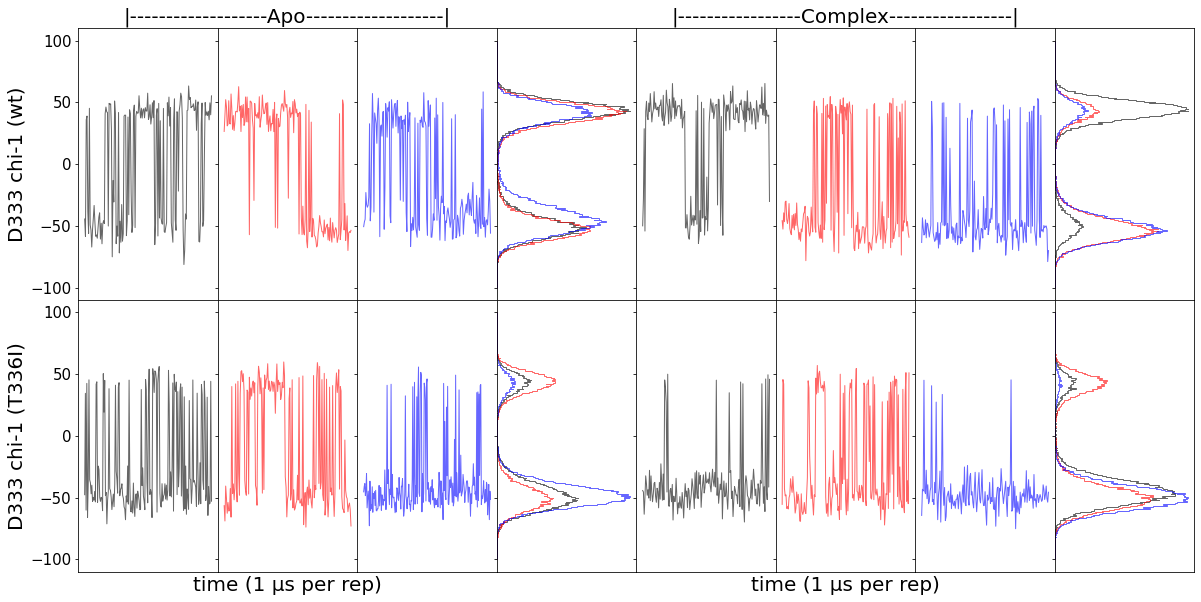

In [56]:
labels = ['Res {}'.format(n) for n in np.arange(242, 243)]
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2, 8, hspace=0, wspace=0)
((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16)) = gs.subplots(sharey=True)
# ax.xaxis.grid(True, which='minor')
plt.rc('ytick', labelsize=25)

for ang1, label in zip(diha.angles.T, labels):
    t1_ang = movingaverage(ang1, 50)
    
for ang2, label in zip(dihb.angles.T, labels):
    t2_ang = movingaverage(ang2, 50)
    
for ang3, label in zip(dihc.angles.T, labels):
    t3_ang = movingaverage(ang3, 50)

for ang4, label in zip(dihd.angles.T, labels):
    t4_ang = movingaverage(ang4, 50)
    
for ang5, label in zip(dihe.angles.T, labels):
    t5_ang = movingaverage(ang5, 50)
    
for ang6, label in zip(dihf.angles.T, labels):
    t6_ang = movingaverage(ang6, 50)

for ang7, label in zip(dihj.angles.T, labels):
    t7_ang = movingaverage(ang7, 50)
    
for ang8, label in zip(dihk.angles.T, labels):
    t8_ang = movingaverage(ang8, 50)
    
for ang9, label in zip(dihl.angles.T, labels):
    t9_ang = movingaverage(ang9, 50)

for ang10, label in zip(dihg.angles.T, labels):
    t10_ang = movingaverage(ang10, 50)
    
for ang11, label in zip(dihh.angles.T, labels):
    t11_ang = movingaverage(ang11, 50)
    
for ang12, label in zip(dihi.angles.T, labels):
    t12_ang = movingaverage(ang12, 50)

stride = 300

ax1.plot(a_time[::stride]*1000, ang1[::stride], lw=1, alpha = 0.6, color= 'k')
ax1.set_ylabel("D333 chi-1 (wt)", size=20)
ax1.set_xticks([])
ax2.plot(b_time[::stride]*1000, ang2[::stride], lw=1, alpha = 0.6, color= 'r')
ax2.set_xticks([])
ax2.set_title('|-------------------Apo-------------------|', size=20)
ax3.plot(c_time[::stride]*1000, ang3[::stride], lw=1, alpha = 0.6, color= 'b')
ax3.set_xticks([])
ax4.hist(ang1, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'k', fill=False)
ax4.hist(ang2, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'r', fill=False)
ax4.hist(ang3, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'b', fill=False)
ax4.set_xticks([])

ax5.plot(d_time[::stride]*1000, ang4[::stride], lw=1, alpha = 0.6, color= 'k')
# ax5.set_ylabel("WT complex X\u2081", size=15)
ax5.set_xticks([])
ax6.plot(e_time[::stride]*1000, ang5[::stride], lw=1, alpha = 0.6, color= 'r')
ax6.set_xticks([])
ax6.set_title('|-----------------Complex-----------------|', size=20)
ax7.plot(f_time[::stride]*1000, ang6[::stride], lw=1, alpha = 0.6, color= 'b')
ax7.set_xticks([])
ax8.hist(ang4, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'k', fill=False)
ax8.hist(ang5, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'r', fill=False)
ax8.hist(ang6, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'b', fill=False)
ax8.set_xticks([])

ax9.plot(j_time[::stride]*1000, ang7[::stride], lw=1, alpha = 0.6, color= 'k')
ax9.set_ylabel("D333 chi-1 (T336I)", size=20)
ax9.set_xticks([])
ax10.plot(k_time[::stride]*1000, ang8[::stride], lw=1, alpha = 0.6, color= 'r')
ax10.set_xticks([])
ax10.set_xlabel("time (1 µs per rep)", size=20)
ax11.plot(l_time[::stride]*1000, ang9[::stride], lw=1, alpha = 0.6, color= 'b')
ax11.set_xticks([])
ax12.hist(ang7, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'k', fill=False)
ax12.hist(ang8, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'r', fill=False)
ax12.hist(ang9, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'b', fill=False)
ax12.set_xticks([])

ax13.plot(g_time[::stride]*1000, ang10[::stride], lw=1, alpha = 0.6, color= 'k')
ax13.set_xticks([])
ax14.plot(h_time[::stride]*1000, ang11[::stride], lw=1, alpha = 0.6, color= 'r')
ax14.set_xlabel("time (1 µs per rep)", size=20)
ax14.set_xticks([])
ax15.plot(i_time[::stride]*1000, ang12[::stride], lw=1, alpha = 0.6, color= 'b')
ax15.set_xticks([])
ax16.hist(ang10, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'k', fill=False)
ax16.hist(ang11, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'r', fill=False)
ax16.hist(ang12, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'b', fill=False)
ax16.set_xticks([])

plt.savefig('fig5_MD_p2_v3.png', dpi=300)

### protonated Asp (Supplementary Figure 11)

In [13]:
u = md.Universe('/FILE/ASP_H/apo/topology.parm7','/FILE/ASP_H/apo/asp_r1_a.nc',format="NC")
v = md.Universe('/FILE/ASP_H/apo/topology.parm7','/FILE/ASP_H/apo/asp_r2_a.nc',format="NC")
w = md.Universe('/FILE/ASP_H/apo/topology.parm7','/FILE/ASP_H/apo/asp_r3_a.nc',format="NC")
x = md.Universe('/FILE/ASP_H/complex/topology.parm7','/FILE/ASP_H/complex/asp_r1_c.nc',format="NC")
y = md.Universe('/FILE/ASP_H/complex/topology.parm7','/FILE/ASP_H/complex/asp_r2_c.nc',format="NC")
z = md.Universe('/FILE/ASP_H/complex/topology.parm7','/FILE/ASP_H/complex/asp_r3_c.nc',format="NC")

In [14]:
pu = u.select_atoms('protein') #or around 4 protein -- selects 4 angstroms around protein
pv = v.select_atoms('protein')
pw = w.select_atoms('protein')
px = x.select_atoms('protein') #or around 4 protein -- selects 4 angstroms around protein
py = y.select_atoms('protein')
pz = z.select_atoms('protein')

In [48]:
chia = pa.residues[242:243]
chib = pb.residues[242:243]
chic = pc.residues[242:243]
chid = pd.residues[242:243]
chie = pe.residues[242:243]
chif = pf.residues[242:243]

ja = dihedrals.Janin(chia).run(step=100)
jb = dihedrals.Janin(chib).run(step=100)
jc = dihedrals.Janin(chic).run(step=100)
jd = dihedrals.Janin(chid).run(step=100)
je = dihedrals.Janin(chie).run(step=100)
jf = dihedrals.Janin(chif).run(step=100)

### APO wt (a,b,c) and Complex wt (d,e,f)

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

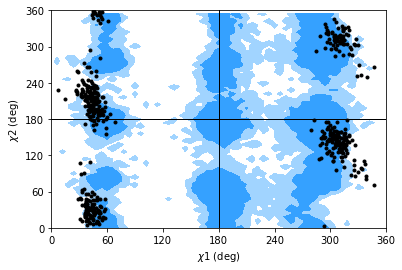

In [50]:
ja.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

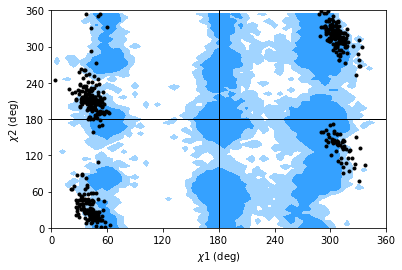

In [51]:
jb.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

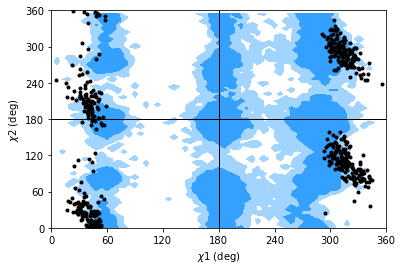

In [52]:
jc.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

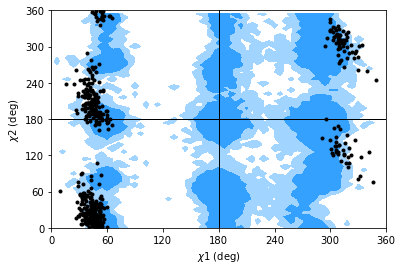

In [59]:
jd.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

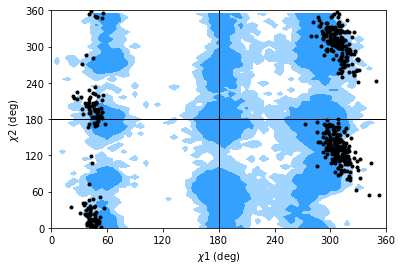

In [60]:
je.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

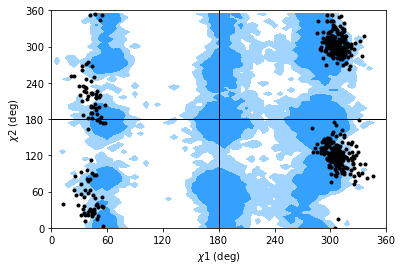

In [61]:
jf.plot(ref=True, marker='.', color='black')

### Apo AspH (u,v,w) and Complex AspH (x,y,z)

In [49]:
from MDAnalysis.analysis.dihedrals import Dihedral

chiu = pu.residues[242:243]
chiv = pv.residues[242:243]
chiw = pw.residues[242:243]
chix = px.residues[242:243]
chiy = py.residues[242:243]
chiz = pz.residues[242:243]
ju = dihedrals.Janin(chiu).run(step=100)
jv = dihedrals.Janin(chiv).run(step=100)
jw = dihedrals.Janin(chiw).run(step=100)
jx = dihedrals.Janin(chix).run(step=100)
jy = dihedrals.Janin(chiy).run(step=100)
jz = dihedrals.Janin(chiz).run(step=100)

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

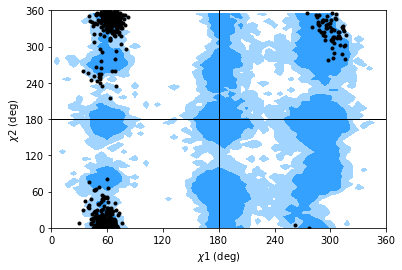

In [53]:
ju.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

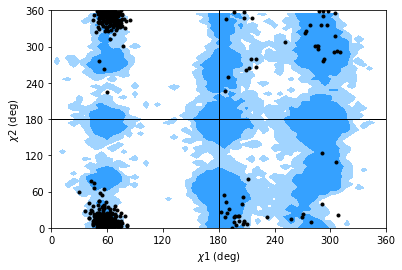

In [54]:
jv.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

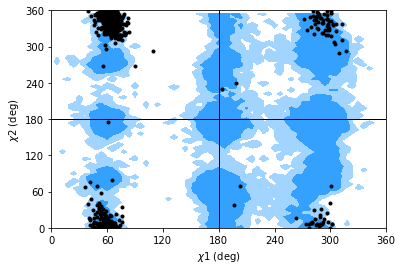

In [55]:
jw.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

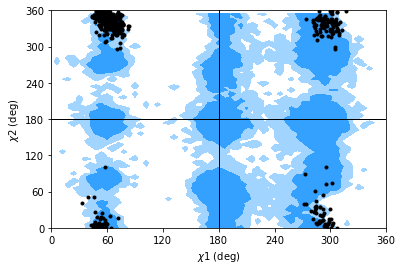

In [57]:
jx.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

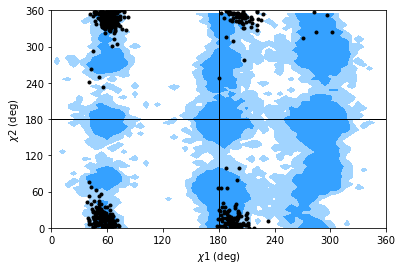

In [58]:
jy.plot(ref=True, marker='.', color='black')

<AxesSubplot:xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

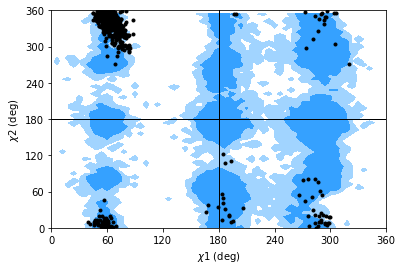

In [56]:
jz.plot(ref=True, marker='.', color='black')

### T336V replicate to compare with Manic Fringe (2j0a)

In [3]:
v1 = md.Universe('/FILE/t336v/topology.parm7','/FILE/t336v/t336v_c.nc',format="NC")
v2 = md.Universe('/FILE/t336v/topology.parm7','/FILE/t336v/t336v_r1_c.nc',format="NC")
v3 = md.Universe('/FILE/t336v/topology.parm7','/FILE/t336v/t336v_r2_c.nc',format="NC")

In [4]:
v1_time = np.array([_.time for _ in v1.trajectory]) # default time: ps
v2_time = np.array([_.time for _ in v2.trajectory])
v3_time = np.array([_.time for _ in v3.trajectory])

In [5]:
# t336v complex select atoms
pv1 = v1.select_atoms('protein')
pv2 = v2.select_atoms('protein')
pv3 = v3.select_atoms('protein')

chiv1 = [res.chi1_selection() for res in pv1.residues[242:243]]
chiv2 = [res.chi1_selection() for res in pv2.residues[242:243]]
chiv3 = [res.chi1_selection() for res in pv3.residues[242:243]]

dihv1 = dihedrals.Dihedral(chiv1).run();
dihv2 = dihedrals.Dihedral(chiv2).run();
dihv3 = dihedrals.Dihedral(chiv3).run();

[]

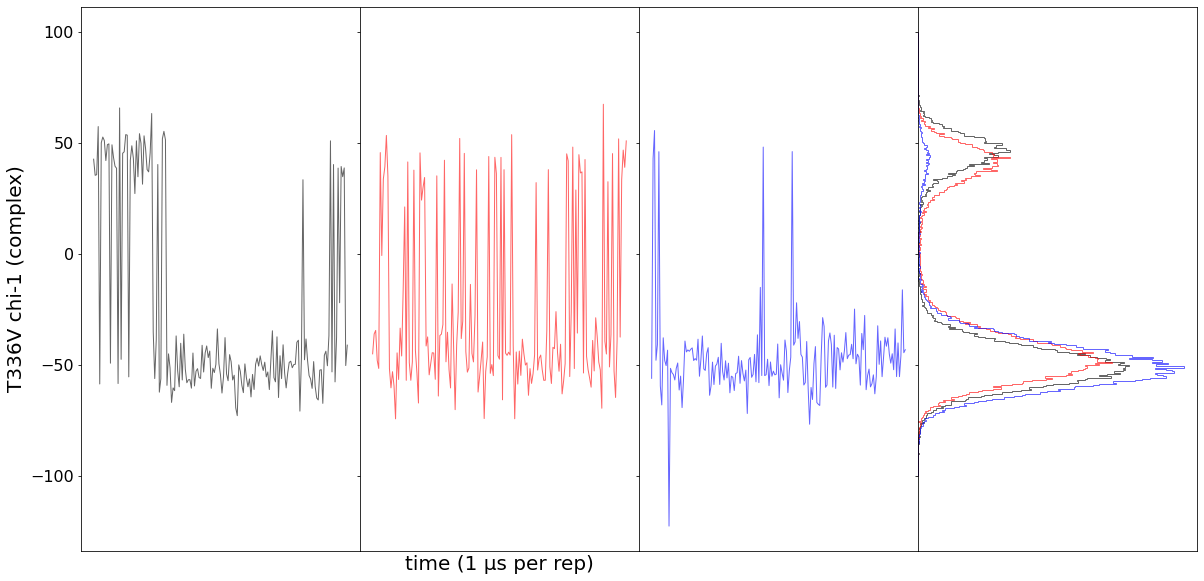

In [9]:
labels = ['Res {}'.format(n) for n in np.arange(242, 243)]
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(1, 4, hspace=0, wspace=0)
((ax1, ax2, ax3, ax4)) = gs.subplots(sharey=True)
plt.rc('ytick', labelsize=16)

for angv1, label in zip(dihv1.angles.T, labels):
    v1_ang = movingaverage(angv1, 50)
    
for angv2, label in zip(dihv2.angles.T, labels):
    v2_ang = movingaverage(angv2, 50)
    
for angv3, label in zip(dihv3.angles.T, labels):
    v3_ang = movingaverage(angv3, 50)

stride = 300

ax1.plot(v1_time[::stride]*1000, angv1[::stride], lw=1, alpha = 0.6, color= 'k')
ax1.set_ylabel("T336V chi-1 (complex)", size=20)
ax1.set_xticks([])
ax2.plot(v2_time[::stride]*1000, angv2[::stride], lw=1, alpha = 0.6, color= 'r')
ax2.set_xticks([])
ax2.set_xlabel("time (1 µs per rep)", size=20)
ax3.plot(v3_time[::stride]*1000, angv3[::stride], lw=1, alpha = 0.6, color= 'b')
ax3.set_xticks([])
ax4.hist(angv1, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'k', fill=False)
ax4.hist(angv2, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'r', fill=False)
ax4.hist(angv3, bins=360, range=(-100,100), orientation='horizontal', histtype='step', alpha = 0.6, color= 'b', fill=False)
ax4.set_xticks([])
 
# plt.savefig('sfig_asp.png', dpi=300)